<a href="https://colab.research.google.com/github/KingNam/Hongong_ml_dl/blob/main/3_RegressionAlgorithm_and_Model_Regulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K- 최근접 이웃 회귀

회귀(Regression) 란 무엇인가?

지도학습 (Supervised Learning)은 target변수를 예측을 목표로 한다.

target변수가 수치변수이면 회귀를 활용하여 수치를 계산하여 예측하고

target변수가 Categorical 변수면 분류(Classification)를 활용하여 target의 Class를 예측한다.


앞서, K-최근접 이웃 모델을 통해 도미와 빙어의 분류 문제를 해결하였다.

이제는 분류가 아닌 회귀 문제를 해결해보자. 

분류와 가까운 샘플을 찾는 것은 비슷하나 예측값이 다르다.
</br></br>
k - 최근접 이웃 분류 (K-Nearest Neighbors Classification)
 - 새로운 샘플과 가장 가까운 샘플 k개를 선택하여 다수 클래스를 새로운 샘플의 클래스로 예측한다.

k - 최근접 이웃 회귀 (K-Nearest Neighnors Regression)
 - 새로운 샘플과 가장 가까운 샘플 k개를 선택하여 샘플의 수치를 활용하여 (ex. 평균값 계산) 새로운 샘플의 타깃값을 예측한다. 



In [4]:
import numpy as np

# 훈련 데이터 준비
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
                         21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
                         23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
                         27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
                         39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
                         44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
                         115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                         150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
                         218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
                         556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
                         850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
                         1000.0])

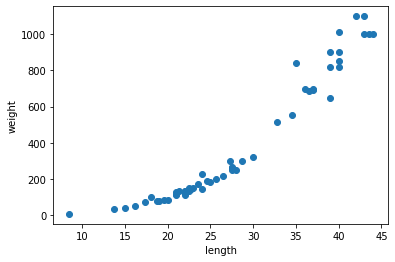

In [9]:
# 산점도 그려보기
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

길이가 늘어남에 따라 무게도 늘어나는 것을 확인


In [42]:
# 데이터를 train_set 과 Test_set으로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

사이킷런에서 사용할 train_set은 2차원 배열이여야 함.</br> 
but, 지금 perch_length 와 perch_weight는 1차원 배열.</br>
따라서, 2차원 배열로 바꿔 주어야함

In [14]:
# reshape 메서드
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [15]:
# 앞에서 두개씩 잘라 행으로 stack
re_test_array = test_array.reshape(2,2)
print(re_test_array)
print(re_test_array.shape)

[[1 2]
 [3 4]]
(2, 2)


In [16]:
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [18]:
train_target

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [ ]:
# reshape 함수에서 크기를 -1 로 지정하면 자동으로 숫자를 계산하여 배정해준다.
# 현재 train_input 에는 42개 원소가 1차 배열로 있음

# 2차원으로 주고 -1,1 로 지정하면 -1값은 42로 계산된다.
train_input= train_input.reshape(-1,1)
print(train_input)

# 2차원에 -1, 3 이면 -1 값은 42/3 = 14 가 된다. (14행 3열)
train_input_14_3 = train_input.reshape(-1,3)
print(train_input_14_3)
train_input_14_3_ver2 = train_input.reshape(14,3)
print(train_input_14_3_ver2)

# 3차원에 2,3,-1 이면 -1 값은 (42/2)/3 = 7 이 된다.
train_input_2_3_7 = train_input.reshape(2,3,-1)
print(train_input_2_3_7)
train_input_2_3_7_ver2 = train_input.reshape(2,3,7)
print(train_input_2_3_7_ver2)


In [44]:
# reshape 함수를 통해 1차원 배열을 42행 1열의 2차원으로 변환
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

# 결정계수 ($R^2$)

$R^2 = 1- \frac{RSS}{TSS}$

RSS(Sum of Squares of Residual): 잔차 제곱합</br>
TSS(Totals of Sum of Squares): 총 제곱합

자세한 설명은 아래링크

[결정계수를 직관적으로 이해하기](https://ko.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/assessing-the-fit-in-least-squares-regression/a/r-squared-intuition)

In [45]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

# K-최근접 이웃 회귀 모델을 훈련시킴
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [47]:
# 결정계수를 계산. 분류에서는 정확도
print(knr.score(test_input,test_target))

0.9928094061010639


In [49]:
# 직접적으로 타깃과 예측한 값 사이의 차이를 구함으로써, 어느정도 예측이 벗어났는지 확인
# mean_absolute_error 함수를 활용해 타깃과 예측값의 절댓값 오차를 평균하여 반환함
from sklearn.metrics import mean_absolute_error

#테스트 세트에 대한 예측을 만듭니다.
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다.
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


결과적으로 예측이 19g 정도 타깃값과 다르다는 것을 알 수 있음.

# 과대적합 vs 과소적합

과대적합(Overfitting): 훈련세트에서 점수가 굉장히 좋았는데 테스트 세트에서 점수가 굉장히 나쁜 경우

과소적합(Underfitting): 훈련세트보다 테스트세트의 점수가 높거나 두 점수가 모두 너무 낮은 경우. </br> 즉, 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우

In [50]:
# 아래의 경우는 test 세트의 점수가 더 높으니, 과소적합
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9698823289099255
0.9928094061010639


문제 해결을 위해 모델을 조금 더 복잡하게 만들면 된다.</br>
k-최근접 알고리즘의 복잡도를 높이는 방법은 k의 개수를 줄이는 것이다. </br>
즉, 새로운 샘플이 들어왔을때 훈련세트에 대한 힌트를 덜 줌으로써 복잡하게 만드는 것. </br>
반대로 모델의 단순화를 위해서는 k의 개수를 늘린다.


In [51]:
# 이웃의 개수를 3으로 설정합니다.
knr.n_neighbors = 3

# 모델을 다시 훈련합니다.
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [54]:
print(knr.score(test_input, test_target))

0.974645996398761
